# Simple Scatter Plots

另一種常用的繪圖類型是簡單的散佈圖，是折線圖的近親。其中的點用點，圓或其他形狀單獨表示，而不是由線段連接。
我們首先設置筆記本以繪製和導入我們將使用的功能：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## 使用``plt.plot``產生散佈圖


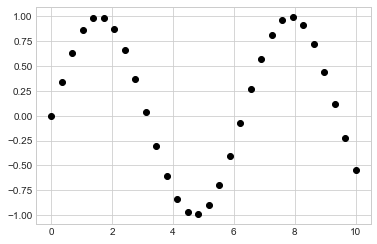

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

函式呼叫中的第三個參數是一個字元，表示用於繪圖的符號類型。 可以指定下列選項，例如``' - '``，``' - '`來控制線型，標記樣式有自己的一組短字串代碼。在這裡展示一些常見的：

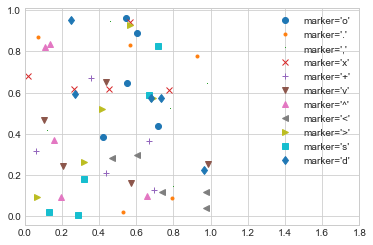

In [3]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

這些字元代碼可以與線和顏色代碼一起使用，以繪製點以及連接它們的線：

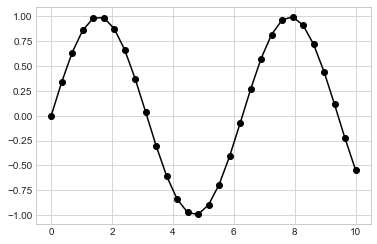

In [4]:
plt.plot(x, y, '-ok');

``plt.plot``的附加關鍵字參數指定了行和標記的各種屬性：

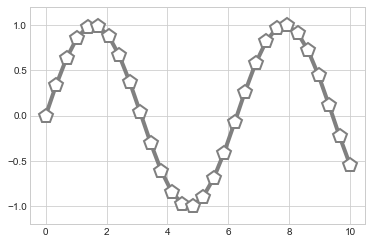

In [5]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## 散佈圖“`plt.scatter``

第二種更強大的創建散佈圖的方法是``plt.scatter``函數，它可以與``plt.plot``函數非常相似地使用：

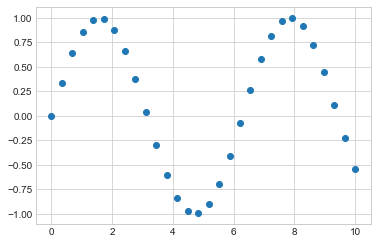

In [6]:
plt.scatter(x, y, marker='o');

``plt.scatter``與``plt.plot``的主要區別在於它可用於創建散佈圖，其中每個單獨的點（大小，面顏色，邊緣顏色等）的屬性可以是 單獨控制或映射到資料。

可通過創建一個包含多種顏色和大小的點的隨機散佈圖來顯示這一點。重疊結果中使用``alpha``關鍵字來調整透明度級別：


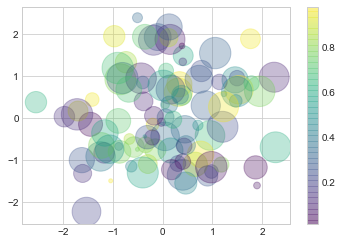

In [7]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

顏色參數自動映射到顏色標度（此處由``colorbar（）``命令顯示），size參數以圖元為單位。通過這種方式，點的顏色和大小可用於在視覺化中傳達資訊，以便視覺化多維資料。

例如，我們可能會使用來自Scikit-Learn的Iris資料，其中每個樣本是三種類型的花朵中的一種，其花瓣和萼片的大小經過仔細測量：

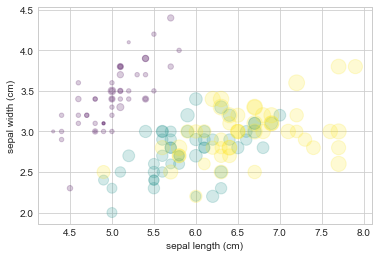

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

我們可以看到，這個散佈圖使我們能夠同時探索資料的四個不同維度：
每個點的（x，y）位置對應于萼片的長度和寬度，該點的大小與花瓣寬度有關，並且顏色與花的特定種類有關。
像這樣的多色和多特徵散佈圖對於資料的探索和呈現都是有用的。

## ``plot`` 對 ``scatter``: 請注意效率上的差異

雖然對於少量資料而言並不重要，因為資料集大於幾千個點，``plt.plot``可能比``plt.scatter``明顯更有效。
原因是``plt.scatter``能夠為每個點渲染不同的大小和/或顏色，因此渲染器必須單獨構建每個點的額外工作。
另一方面，在“plt.plot”中，點總是基本上是彼此的克隆，因此確定點的外觀的工作僅對整個資料集進行一次。
對於大型資料集，這兩者之間的差異可能會導致性能大不相同，因此，對於大型資料集，``plt.plot``應優先於``plt.scatter``。
